## Mnist digit classification

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import DataLoader, TensorDataset
import torchvision

from sklearn.datasets import load_digits
from sklearn import datasets
from sklearn.model_selection import train_test_split

import pandas as pd

from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
%config InlineBackend.figure_format = 'retina'

In [2]:
mnist = datasets.fetch_mldata('MNIST original', data_home='./data/')
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [3]:
# Normalize
mnist_data = mnist.data / 255
pd.DataFrame(mnist_data).head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


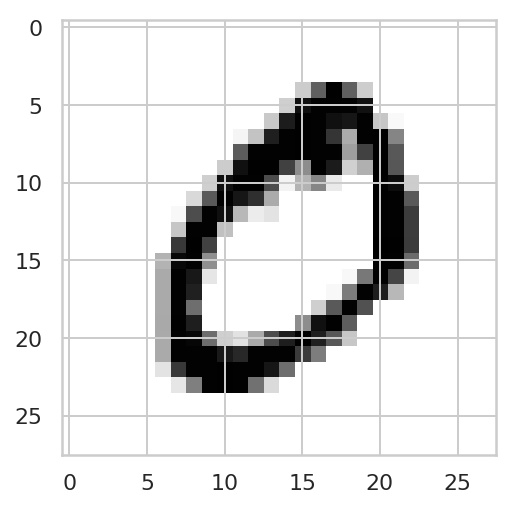

In [4]:
plt.imshow(mnist_data[0].reshape(28, 28), cmap=cm.gray_r)
plt.show()

In [5]:
mnist_label = mnist.target
mnist_label

array([0., 0., 0., ..., 9., 9., 9.])

In [6]:
# Train dataset, test set split
X_train, X_test, y_train, y_test = train_test_split(mnist_data, mnist_label, stratify=mnist_label, test_size=0.2, random_state=0)

### generate Tensor

In [7]:
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).long()

X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).long()

In [8]:
print(X_train.shape)
print(y_train.shape)

torch.Size([56000, 784])
torch.Size([56000])


### generate train dataset, dataloader

In [9]:
train_dataset = TensorDataset(X_train, y_train)

print(train_dataset[0])

train_loader = DataLoader(train_dataset, batch_size=1024, shuffle=True)

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000,

In [10]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 256)
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(128, 128)
        self.fc6 = nn.Linear(128, 10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.dropout(x, training=self.training)
        x = self.fc6(x)
        return F.log_softmax(x, dim=1)

In [11]:
model = Net()

### Training

In [12]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(1000):
    total_loss = 0
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        
        output = model(batch_x)
        batch_loss = criterion(output, batch_y)
        batch_loss.backward()
        optimizer.step()
        
        total_loss += batch_loss.item()
        
    if (epoch+1) % 500 == 0:
        print(epoch+1, total_loss)
    

500 0.7996124187484384
1000 0.11411385098472238


### Validation

In [14]:
X_test, y_test = Variable(X_test), Variable(y_test)

result = torch.max(model(X_test).data, 1)[1]
accuracy = sum(y_test.data.numpy()==result.numpy()) / len(y_test.data.numpy())
accuracy

0.9604285714285714